In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv("sales_performance_10000.csv")
df.head()


,Order ID,Order Date,Region,Customer Name,Customer Segment,Product Category,Sub-Category,Quantity,Unit Price,Discount,Sales,Profit
0,1,2022-04-13,Central,Krishna,Home Office,Office Supplies,Paper,1,314.21,0.10,282.79,76.23
1,2,2023-03-12,South,Saanvi,Corporate,Office Supplies,Pens,9,1006.38,0.05,8604.55,2340.09
2,3,2022-09-28,Central,Kavya,Home Office,Electronics,Laptop,9,1889.45,0.05,16154.80,1953.70
3,4,2022-04-17,North,Rohit,Home Office,Office Supplies,Pens,8,1020.25,0.10,7345.80,2065.08
4,5,2022-03-13,North,Nisha,Corporate,Furniture,Storage,5,1032.20,0.00,5161.00,333.24


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10000 non-null  int64  
 1   Order Date        10000 non-null  object 
 2   Region            10000 non-null  object 
 3   Customer Name     10000 non-null  object 
 4   Customer Segment  10000 non-null  object 
 5   Product Category  10000 non-null  object 
 6   Sub-Category      10000 non-null  object 
 7   Quantity          10000 non-null  int64  
 8   Unit Price        10000 non-null  float64
 9   Discount          10000 non-null  float64
 10  Sales             10000 non-null  float64
 11  Profit            10000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 937.6+ KB


In [5]:
df.describe()

,Order ID,Quantity,Unit Price,Discount,Sales,Profit
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5.039500,1031.957565,0.100680,4669.107444,818.015577
std,2886.89568,2.564137,562.156375,0.070933,3722.409581,778.941090
min,1.00000,1.000000,50.020000,0.000000,44.300000,3.940000
25%,2500.75000,3.000000,550.110000,0.050000,1575.015000,237.212500
50%,5000.50000,5.000000,1035.030000,0.100000,3656.120000,559.845000
75%,7500.25000,7.000000,1518.760000,0.150000,6965.107500,1154.185000
max,10000.00000,9.000000,1999.790000,0.200000,17979.210000,4877.120000


In [6]:
df.isnull().sum()
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [8]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')
df['Month_str'] = df['Order Date'].dt.strftime('%Y-%m')


C:\Users\kumar\Appdata\local\python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


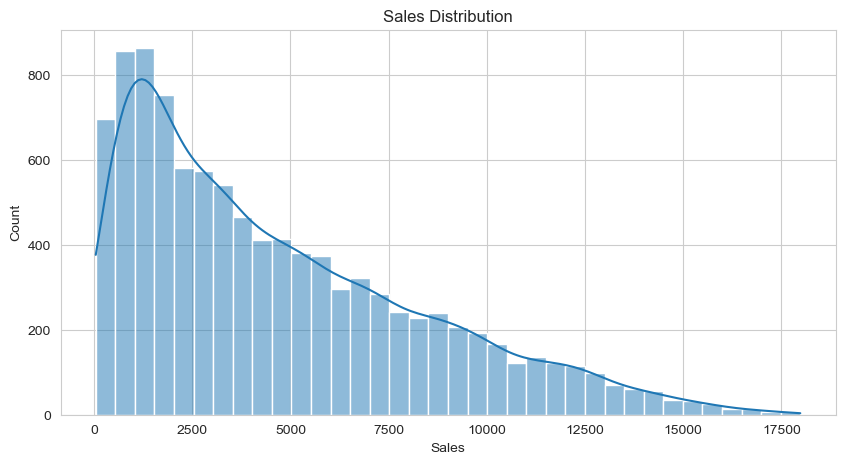

In [9]:
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()


C:\Users\kumar\Appdata\local\python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


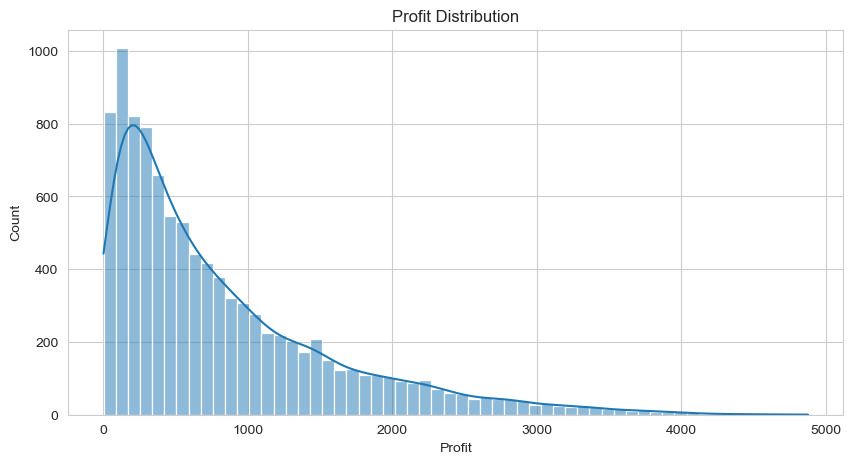

In [10]:
sns.histplot(df['Profit'], kde=True)
plt.title("Profit Distribution")
plt.show()


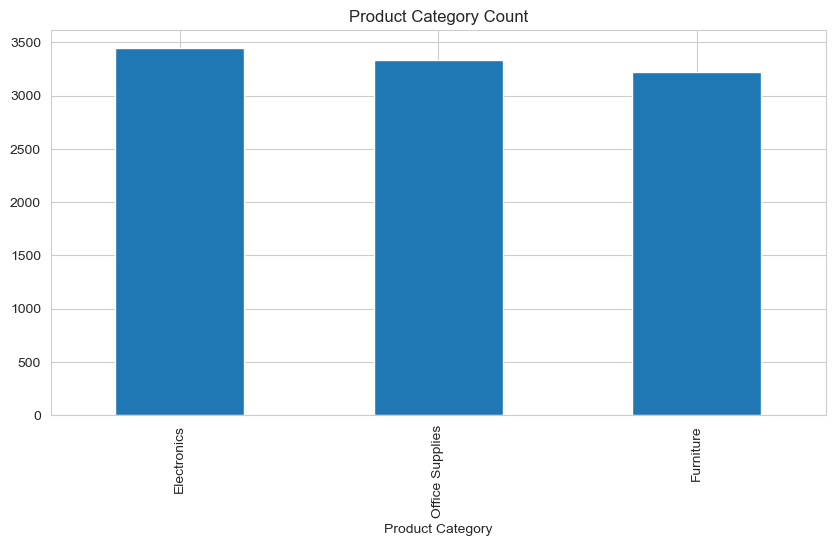

In [11]:
df['Product Category'].value_counts().plot(kind='bar')
plt.title("Product Category Count")
plt.show()


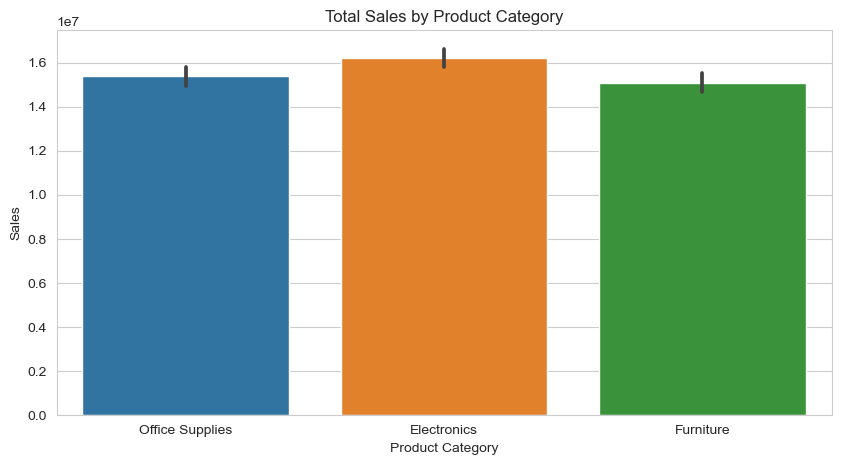

In [12]:
sns.barplot(x='Product Category', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Product Category")
plt.show()


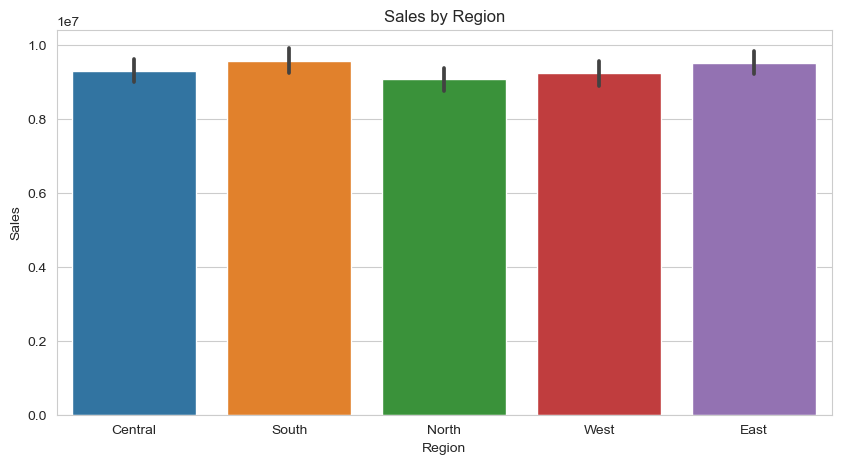

In [13]:
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Sales by Region")
plt.show()


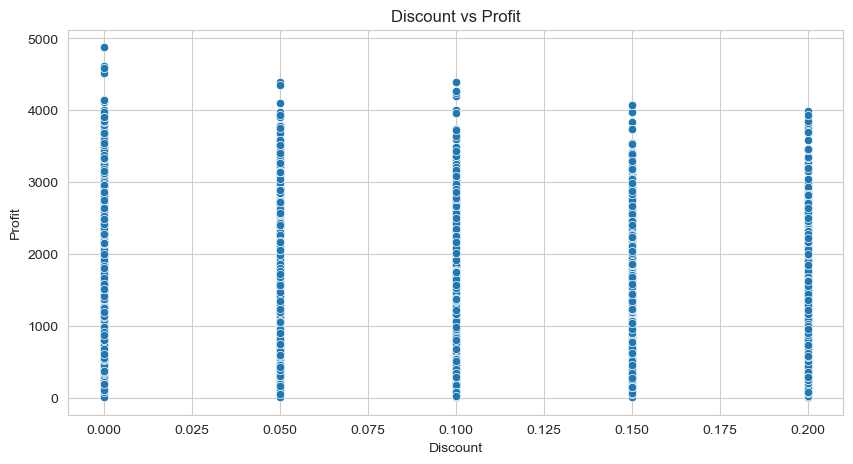

In [14]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


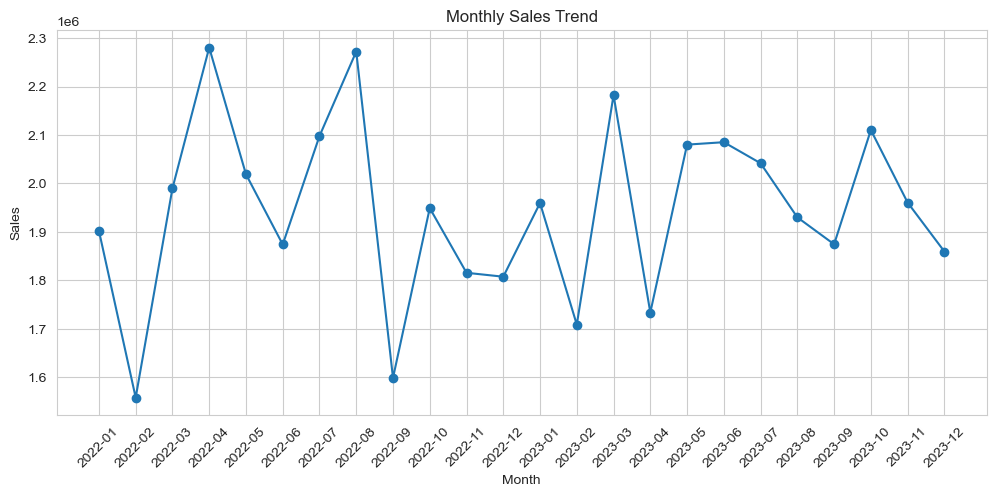

In [15]:
monthly_sales = df.groupby('Month_str')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month_str'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [16]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)


Customer Name
Shiva      2587048.47
Rohit      2559168.32
Aditya     2546368.23
Riya       2544350.86
Vihaan     2519963.82
Kunal      2483059.59
Pooja      2418625.32
Aarav      2415476.72
Krishna    2370870.84
Arjun      2342574.58
Name: Sales, dtype: float64

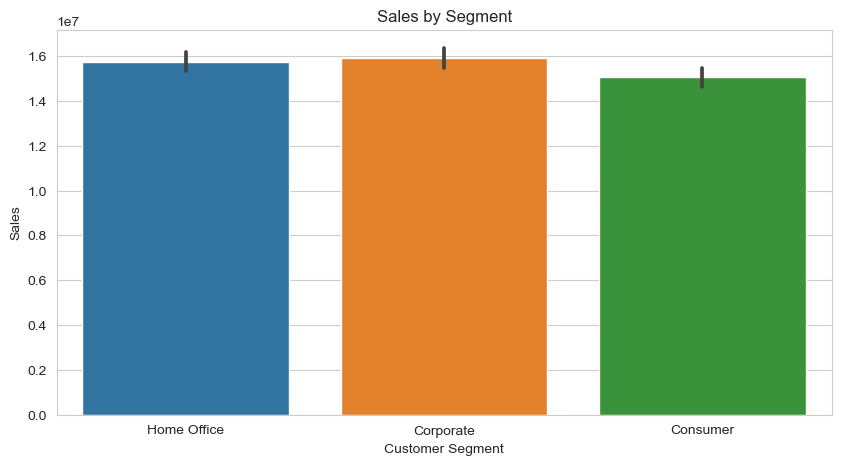

In [17]:
sns.barplot(x='Customer Segment', y='Sales', data=df, estimator=sum)
plt.title("Sales by Segment")
plt.show()


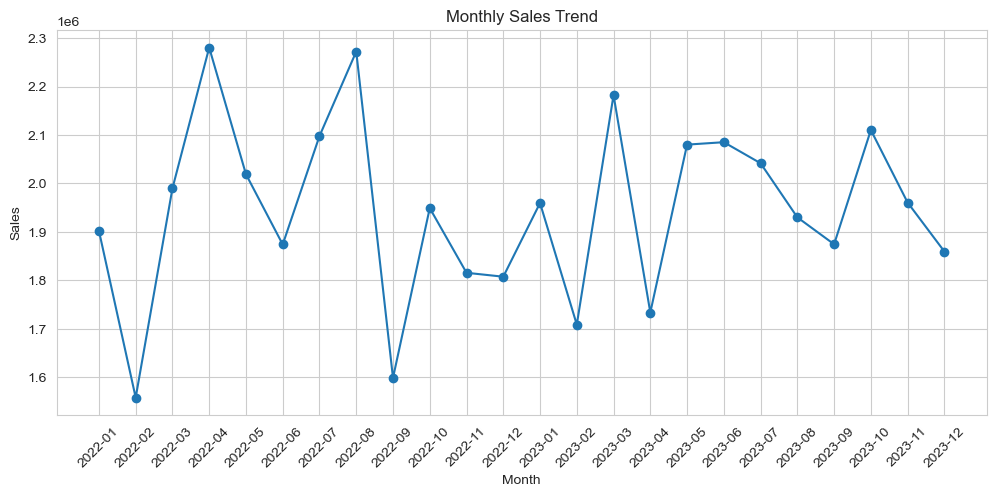

In [18]:
monthly_sales = df.groupby('Month_str')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month_str'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


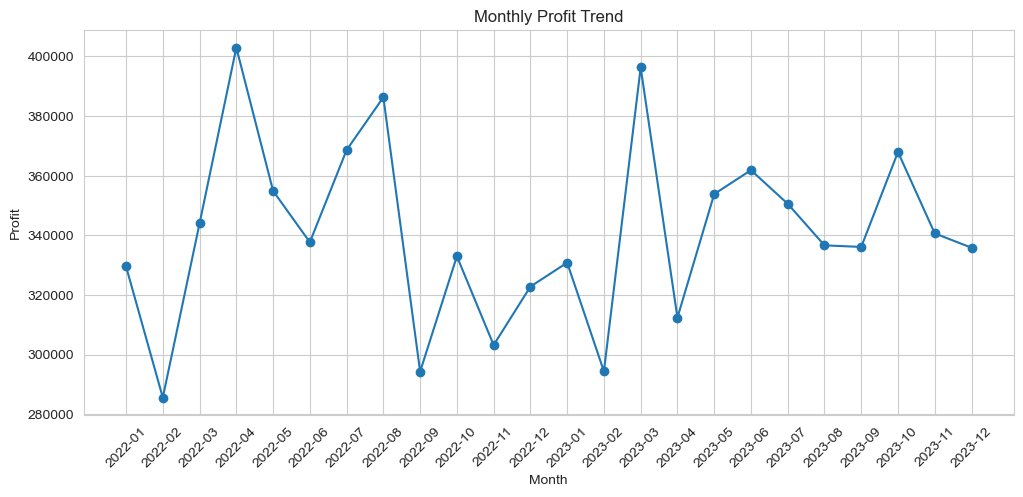

In [19]:
monthly_profit = df.groupby('Month_str')['Profit'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_profit['Month_str'], monthly_profit['Profit'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()


In [20]:
cat_sales = df.groupby('Product Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
cat_sales


,Sales,Profit
Product Category,,
Electronics,16219266.49,2838669.07
Office Supplies,15385856.20,2660222.01
Furniture,15085951.75,2681264.69


In [21]:
region_sales = df.groupby('Region')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
region_sales


,Sales,Profit
Region,,
South,9559385.08,1688170.45
East,9520856.09,1651649.68
Central,9302135.61,1624707.35
West,9234496.12,1610708.64
North,9074201.54,1604919.65


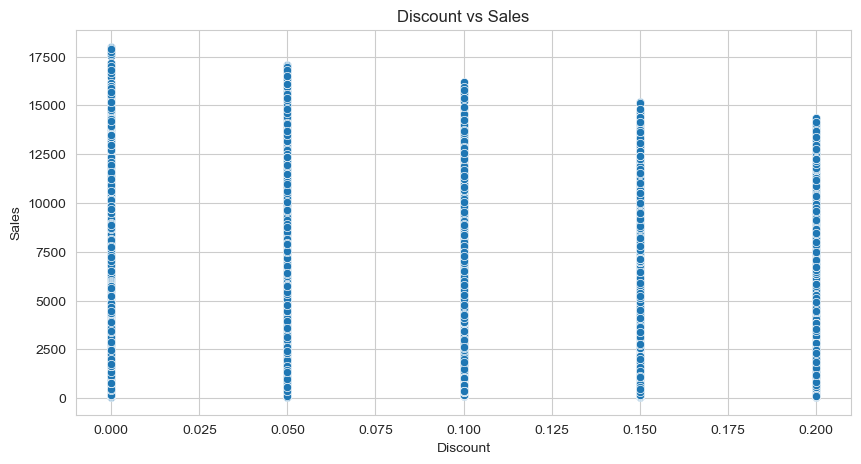

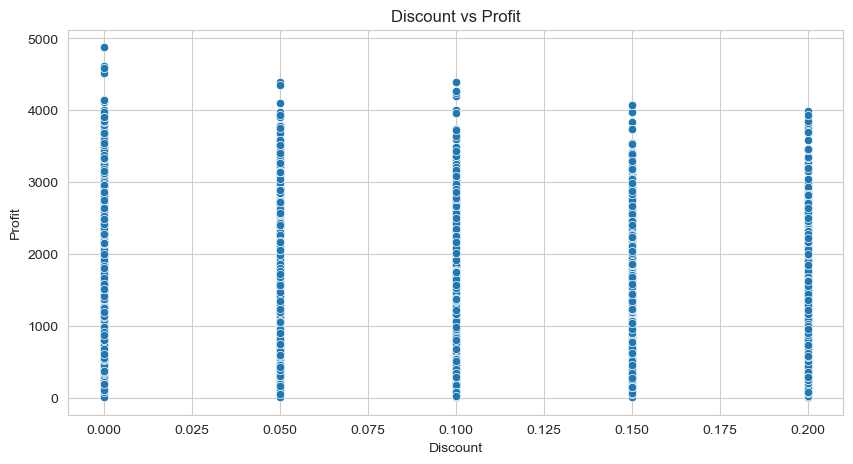

In [22]:
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title("Discount vs Sales")
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


In [23]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)


Sub-Category
Mobile         5481671.53
Accessories    5452228.65
Storage        5345990.92
Binders        5285568.27
Laptop         5285366.31
Paper          5058541.72
Pens           5041746.21
Chairs         4945684.26
Tables         4794276.57
Name: Sales, dtype: float64